# Purpose:
The purpose of this notebook is to experiment with different learning rates to see their impacts on the models losses.

* Toy data will be created
* A classification model will be constructed with fitting and plotting functions
* A loop through different learning rates and their associated losses will be plotted

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

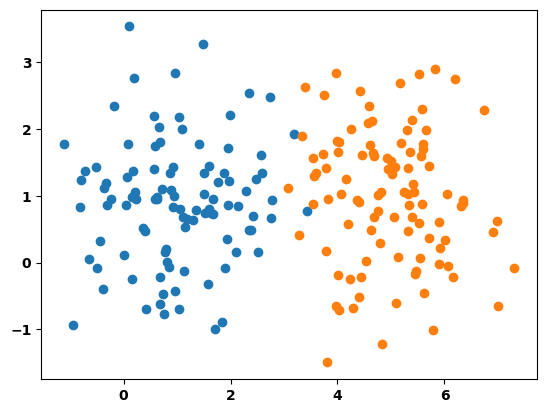

In [2]:
# generating toy data

n_cluster = 100
blur = 1

A = [1,1]
B = [5,1] # this will offset the data by 5 on the x-axis

# x and y data per class a and b aka 0 and 1
a = [A[0]+np.random.randn(n_cluster)*blur, A[1]+np.random.randn(n_cluster)*blur]
b = [B[0]+np.random.randn(n_cluster)*blur, B[1]+np.random.randn(n_cluster)*blur]

# labeling the first hundred as 0s and the next hundred as 1s
labels_np = np.vstack((np.zeros((n_cluster,1)), np.ones((n_cluster,1))))


data_np = np.hstack((a,b)).T


data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

plt.scatter(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1])
plt.scatter(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1])

In [3]:
# constructing an ANN Classification model

class ANN_Classifier(nn.Module):
    
    def __init__(self,lr=0.01,epochs=500):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self,X,y):
        self.X = X
        self.y = y
        
        ANN_clf = nn.Sequential(
            nn.Linear(2,1),
            nn.ReLU(),
            nn.Linear(1,1)
            )
        loss_fn = nn.BCEWithLogitsLoss()
        opti = torch.optim.SGD(ANN_clf.parameters(), self.lr)
        
        self.losses = torch.zeros(self.epochs)
        
        for epoch in range(self.epochs):
            pred = ANN_clf(self.X)
            loss = loss_fn(pred,self.y)
            self.losses[epoch] = loss
            
            opti.zero_grad()
            loss.backward()
            opti.step()
    
    def plot_losses(self, label=None):
        plt.plot(range(self.epochs), self.losses.detach().numpy(), label=label)
        plt.title('Losses per Epoch')
        plt.grid()
        plt.legend();

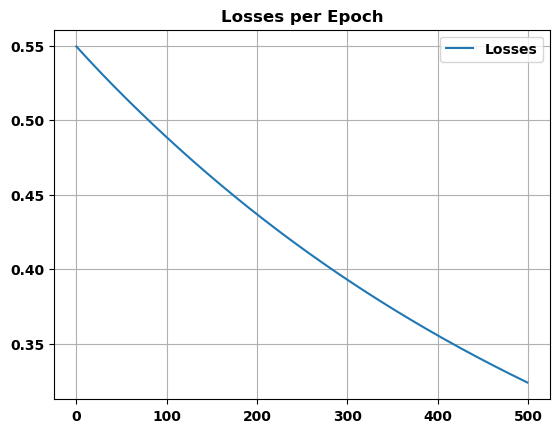

In [4]:
# testing the ANN class

clf = ANN_Classifier(lr=0.01)
clf.fit(X=data, y=labels)
clf.plot_losses(label='Losses')

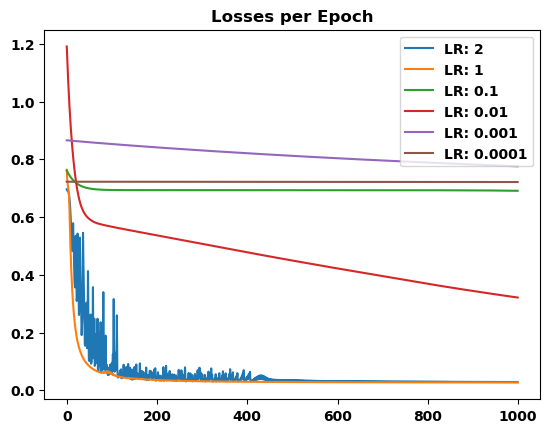

In [6]:
lr_list = [2, 1, 0.1, 0.01, 0.001, 0.0001]

for lr_i in lr_list:
    clf = ANN_Classifier(lr=lr_i, epochs=1000)
    clf.fit(X=data, y=labels)
    clf.plot_losses(label=f'LR: {lr_i}')